## Examining Noise Schedules in Diffusion Models  
  
This section focuses on an empirical examination of noise scheduling strategies in denoising diffusion generative models. Three key discoveries were made:  
  
1. **The Importance of Noise Scheduling:** The noise scheduling is critical for performance, and the best approach varies based on the task, such as different image sizes.  
2. **Noise Scheduling and Image Size:** With an increase in image size, the optimal noise scheduling tends to be noisier. This is attributed to an increase in pixel redundancy.  
3. **Scaling Input Data:** A viable strategy across different image sizes is to simply scale the input data by a factor of 'b' while maintaining a fixed noise schedule function. This is equivalent to shifting the logSNR (Signal-to-Noise Ratio) by log(b).  


The importance of noise schedule can be demonstrated by the example in the figure below. As we increase the
image size, the denoising task at the same noise level becomes simpler. This is due to the
redundancy of information in data (e.g., correlation among nearby pixels) typically increases with the image
size. Furthermore, the noises are independently added to each pixels, making it easier to recover the original
signal when image size increases. Therefore, the optimal schedule at a smaller resolution may not be optimal
at a higher resolution. And if we do not adjust the scheduling accordingly, it may lead to under training of
certain noise levels.

![Example-of-same-level-noise](./docs/Noise-schedule.png)


In [5]:
import numpy as np

def simple_linear_schedule(t, clip_min=1e-9):
    # A gamma function that simply is 1-t.
    return np.clip(1 - t, clip_min, 1.)


def sigmoid_schedule(t, start=-3, end=3, tau=1.0, clip_min=1e-9):
    # A gamma function based on sigmoid function.
    v_start = sigmoid(start / tau)
    v_end = sigmoid(end / tau)
    output = sigmoid((t * (end - start) + start) / tau)
    output = (v_end - output) / (v_end - v_start)
    return np.clip(output, clip_min, 1.)

def cosine_schedule(t, start=0, end=1, tau=1, clip_min=1e-9):
    # A gamma function based on cosine function.
    v_start = math.cos(start * math.pi / 2) ** (2 * tau)
    v_end = math.cos(end * math.pi / 2) ** (2 * tau)
    output = math.cos((t * (end - start) + start) * math.pi / 2) ** (2 * tau)
    output = (v_end - output) / (v_end - v_start)
    return np.clip(output, clip_min, 1.)

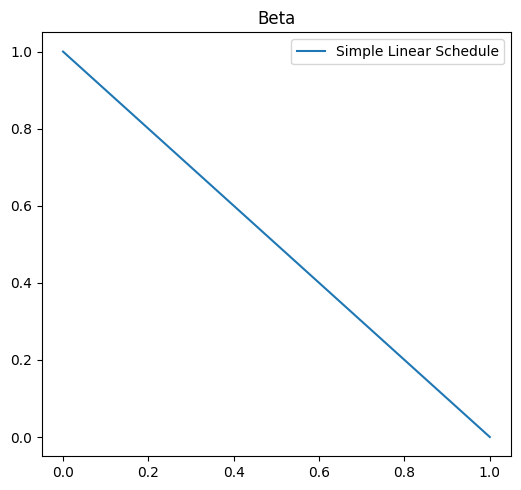

In [11]:
t = np.linspace(0,1, 1000)
simple_sc = simple_linear_schedule(t)


plt.figure(figsize=(15,5))  
  
plt.subplot(1,3,1)  
plt.plot(t, simple_sc, label='Simple Linear Schedule')  
#plt.plot(beta_t_lin, label='Linear')  
plt.title('Beta')  
plt.legend()  
  
plt.tight_layout()  
plt.show()  

array([1.00000000e+00, 9.98998999e-01, 9.97997998e-01, 9.96996997e-01,
       9.95995996e-01, 9.94994995e-01, 9.93993994e-01, 9.92992993e-01,
       9.91991992e-01, 9.90990991e-01, 9.89989990e-01, 9.88988989e-01,
       9.87987988e-01, 9.86986987e-01, 9.85985986e-01, 9.84984985e-01,
       9.83983984e-01, 9.82982983e-01, 9.81981982e-01, 9.80980981e-01,
       9.79979980e-01, 9.78978979e-01, 9.77977978e-01, 9.76976977e-01,
       9.75975976e-01, 9.74974975e-01, 9.73973974e-01, 9.72972973e-01,
       9.71971972e-01, 9.70970971e-01, 9.69969970e-01, 9.68968969e-01,
       9.67967968e-01, 9.66966967e-01, 9.65965966e-01, 9.64964965e-01,
       9.63963964e-01, 9.62962963e-01, 9.61961962e-01, 9.60960961e-01,
       9.59959960e-01, 9.58958959e-01, 9.57957958e-01, 9.56956957e-01,
       9.55955956e-01, 9.54954955e-01, 9.53953954e-01, 9.52952953e-01,
       9.51951952e-01, 9.50950951e-01, 9.49949950e-01, 9.48948949e-01,
       9.47947948e-01, 9.46946947e-01, 9.45945946e-01, 9.44944945e-01,
      

In [2]:
import matplotlib.pyplot as plt
from utils.schedules import cosine_schedule, linear_schedule

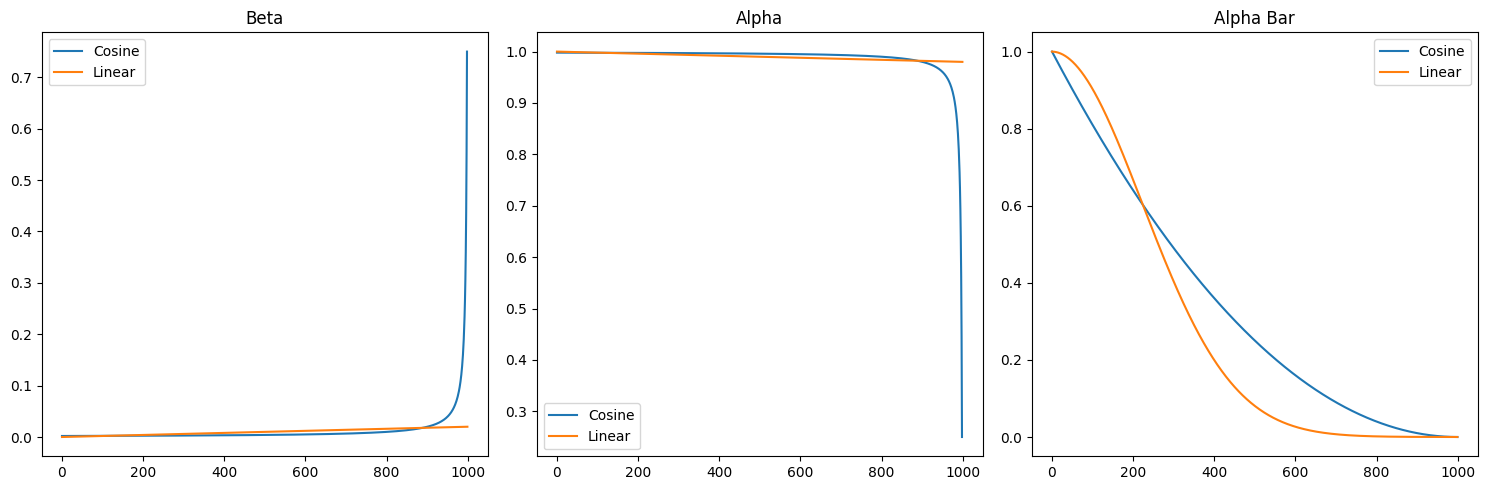

In [4]:
beta_min, beta_max = 1e-5, 0.02
T = 1000
s = 200

beta_t_lin, alpha_t_lin, alphabar_t_lin = linear_schedule(beta_min, beta_max, T)  
beta_t_cos, alpha_t_cos, alphabar_t_cos = cosine_schedule(T, s) 



plt.figure(figsize=(15,5))  
  
plt.subplot(1,3,1)  
plt.plot(beta_t_cos, label='Cosine')  
plt.plot(beta_t_lin, label='Linear')  
plt.title('Beta')  
plt.legend()  
  
plt.subplot(1,3,2)  
plt.plot(alpha_t_cos, label='Cosine')  
plt.plot(alpha_t_lin, label='Linear')  
plt.title('Alpha')  
plt.legend()  
  
plt.subplot(1,3,3)  
plt.plot(alphabar_t_cos, label='Cosine')  
plt.plot(alphabar_t_lin, label='Linear')  
plt.title('Alpha Bar')  
plt.legend()  
  
plt.tight_layout()  
plt.show()  